In [1]:
import sys
sys.path.append('../src')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from time import time

from instance import Instance
from sweep import sweep
from cost import cost

First we choose an instance to work on

In [2]:
I = Instance(
    instance_dir='../data/raw',
    instance='n50_s01_t01_w01'
)

Let's see what it looks like

In [3]:
G = nx.Graph()
for i in range(I.n+1): G.add_node(i, pos=I.nodes[i])
pos = nx.get_node_attributes(G, 'pos')

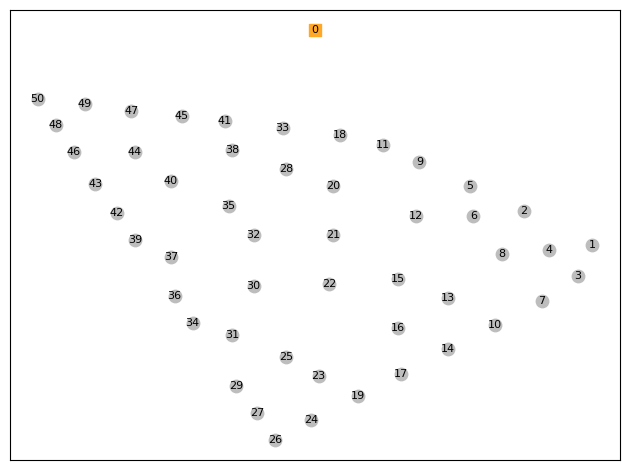

In [4]:
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0],
                       node_color='#FFA726',
                       node_size=80,
                       node_shape='s')
nx.draw_networkx_nodes(G, pos,
                       nodelist=range(1, I.n+1),
                       node_color='#BDBDBD',
                       node_size=80)
nx.draw_networkx_labels(G, pos,
                        font_size=8)
plt.tight_layout()
plt.show()

Let's run sweep with arbitrary parameters first

In [5]:
solution = sweep(I,
      starting_turbine=10,
      clockwise=False,
      tpg=20)

Let's see what it looks like

/tmp/ipykernel_11150/1148517937.py:10: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


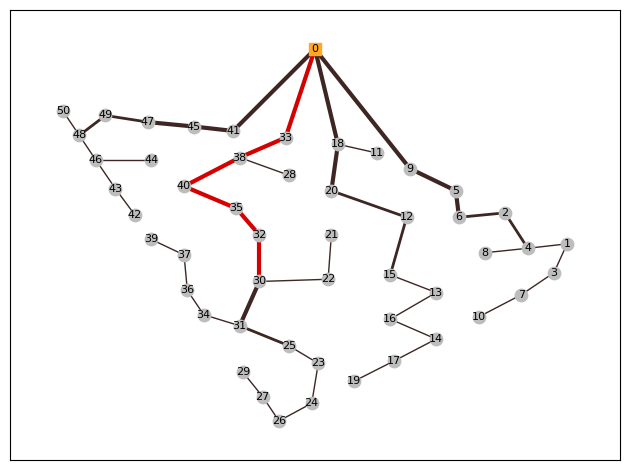

In [6]:
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0],
                       node_color='#FFA726',
                       node_size=80,
                       node_shape='s')
nx.draw_networkx_nodes(G, pos,
                       nodelist=range(1, I.n+1),
                       node_color='#BDBDBD',
                       node_size=80)
nx.draw_networkx_edges(G, pos,
                       edgelist=[[x[0][0], x[0][1]] for x in solution],
                       edge_color=['#3E2723' if x[1]>=0 else '#D50000' for x in solution],
                       width=[x[1]+1 if x[1]>=0 else len(I.cables) for x in solution])
nx.draw_networkx_labels(G, pos,
                        font_size=8)
plt.tight_layout()
plt.show()

The width of cable represent its capacity. A red one means overflow.

Let's run sweep over all possibilities.

In [7]:
t = time()
solutions = []
for starting_turbine in range(1, I.n+1):
    for clockwise in [True, False]:
        for tpg in range(1, I.n+1):
            solutions.append([
                starting_turbine,
                clockwise,
                tpg,
                sweep(I, starting_turbine, clockwise, tpg)])
for sol in solutions:
    sol.append(cost(I, sol[-1]))
print(f'Took {round(time()-t, 1)}s')

Took 21.0s


In [8]:
solutions_df = pd.DataFrame(solutions, columns=['starting_turbine', 'clockwise', 'tpg', 'solution', 'cost'])
solutions_df = solutions_df.sort_values('cost')
solutions_df = solutions_df.reset_index()
solutions_df

,index,starting_turbine,clockwise,tpg,solution,cost
0,4360,44,False,11,"[[(9, 11), 2], [(5, 9), 2], [(6, 5), 2], [(2, ...",3.617622e+07
1,10,1,True,11,"[[(9, 11), 2], [(5, 9), 2], [(6, 5), 2], [(2, ...",3.617622e+07
2,4761,48,False,12,"[[(9, 11), 2], [(5, 9), 2], [(6, 5), 2], [(2, ...",3.657756e+07
3,11,1,True,12,"[[(9, 11), 2], [(5, 9), 2], [(6, 5), 2], [(2, ...",3.657756e+07
4,3260,33,False,11,"[[(9, 11), 2], [(5, 9), 2], [(6, 5), 2], [(2, ...",3.666252e+07
...,...,...,...,...,...,...
4995,4748,48,True,49,"[[(18, 33), -27], [(11, 18), -26], [(9, 11), -...",3.000328e+11
4996,4597,46,False,48,"[[(18, 33), -27], [(11, 18), -26], [(9, 11), -...",3.000331e+11
4997,4847,49,True,48,"[[(18, 33), -27], [(11, 18), -26], [(9, 11), -...",3.000331e+11
4998,4596,46,False,47,"[[(18, 33), -27], [(11, 18), -26], [(9, 11), -...",3.000332e+11


Plotting the costs in ascending order gives this graph

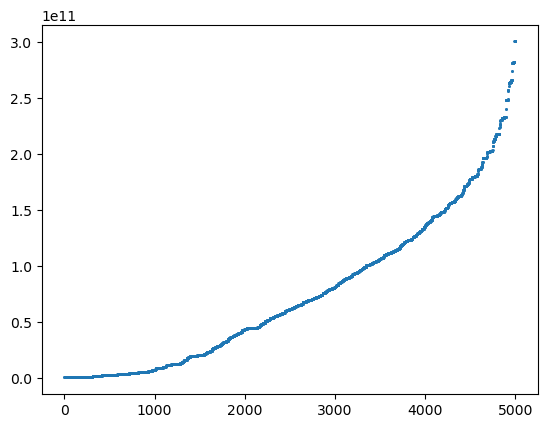

In [9]:
plt.scatter(solutions_df.index, solutions_df['cost'], s=1)
plt.show()

### Best solution

#### Best parameters

In [10]:
print(solutions_df.loc[0,['starting_turbine', 'clockwise', 'tpg', 'cost']])

starting_turbine                 44
clockwise                     False
tpg                              11
cost                36176222.396929
Name: 0, dtype: object


#### Graph

/tmp/ipykernel_11150/545776659.py:10: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos,


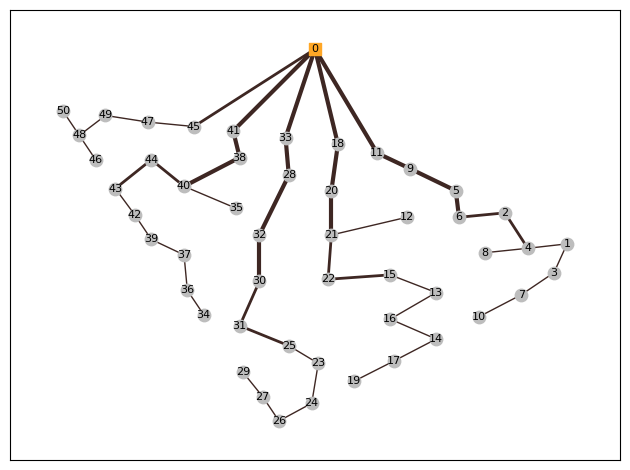

In [11]:
nx.draw_networkx_nodes(G, pos,
                       nodelist=[0],
                       node_color='#FFA726',
                       node_size=80,
                       node_shape='s')
nx.draw_networkx_nodes(G, pos,
                       nodelist=range(1, I.n+1),
                       node_color='#BDBDBD',
                       node_size=80)
nx.draw_networkx_edges(G, pos,
                       edgelist=[[x[0][0], x[0][1]] for x in solutions_df['solution'][0]],
                       edge_color=['#3E2723' if x[1]>=0 else '#D50000' for x in solutions_df['solution'][0]],
                       width=[x[1]+1 if x[1]>=0 else len(I.cables) for x in solutions_df['solution'][0]])
nx.draw_networkx_labels(G, pos,
                        font_size=8)
plt.tight_layout()
plt.show()